In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pop_est = pd.read_csv('data/nst-est2018-alldata.csv')
pop_est.head(3)

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833


In [3]:
pop_est.NAME.unique()

array(['United States', 'Northeast Region', 'Midwest Region',
       'South Region', 'West Region', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [5]:
pop_est_tn = pop_est.loc[pop_est.NAME == 'Tennessee']

In [8]:
pop_est_tn.shape

(1, 136)

In [11]:
pop_est_tn.columns.values

array(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'CENSUS2010POP',
       'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011',
       'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014',
       'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017',
       'POPESTIMATE2018', 'NPOPCHG_2010', 'NPOPCHG_2011', 'NPOPCHG_2012',
       'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015', 'NPOPCHG_2016',
       'NPOPCHG_2017', 'NPOPCHG_2018', 'BIRTHS2010', 'BIRTHS2011',
       'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014', 'BIRTHS2015',
       'BIRTHS2016', 'BIRTHS2017', 'BIRTHS2018', 'DEATHS2010',
       'DEATHS2011', 'DEATHS2012', 'DEATHS2013', 'DEATHS2014',
       'DEATHS2015', 'DEATHS2016', 'DEATHS2017', 'DEATHS2018',
       'NATURALINC2010', 'NATURALINC2011', 'NATURALINC2012',
       'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'NATURALINC2016', 'NATURALINC2017', 'NATURALINC2018',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011',
       'INTERNATIONALMIG2012', 

In [12]:
pop_est_tn = pop_est_tn[['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
                        'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
                        'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018']]
pop_est_tn

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
47,6355301,6397410,6451281,6493432,6540826,6590808,6645011,6708794,6770010


In [39]:
jobs = pd.read_excel('data/SWXX 2019--jobs.xlsm', 'Jobs', na_values = '*')
jobs.head(3)

,seasonal,year,super,month,United States,Alabama,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Unnamed: 56
0,S,1990,Total Nonfarm,January,109197.0,1636.8,230.8,1473.4,912.5,12495.2,...,2191.7,7028.6,712.5,261.5,2901.5,2122.2,606.9,2268.7,195.7,NaN
1,S,1990,Total Nonfarm,February,109435.0,1634.9,233.0,1475.8,912.3,12500.7,...,2195.1,7038.5,712.8,260.1,2907.6,2126.1,607.4,2278.7,196.3,NaN
2,S,1990,Total Nonfarm,March,109644.0,1633.0,235.4,1478.5,915.6,12503.6,...,2199.4,7057.6,715.6,259.9,2911.3,2131.1,611.9,2280.6,197.5,NaN


In [40]:
tn_jobs = jobs[['seasonal', 'year', 'super', 'month', 'Tennessee']]
tn_jobs.head(3)

,seasonal,year,super,month,Tennessee
0,S,1990,Total Nonfarm,January,2191.7
1,S,1990,Total Nonfarm,February,2195.1
2,S,1990,Total Nonfarm,March,2199.4


In [41]:
tn_jobs.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [42]:
tn_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16380 entries, 0 to 16379
Data columns (total 5 columns):
seasonal     16380 non-null object
year         16380 non-null int64
super        16380 non-null object
month        16380 non-null object
Tennessee    15267 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 639.9+ KB


In [43]:
tn_jobs = tn_jobs.loc[tn_jobs.year.isin(['2010', '2011', '2012', '2013',
                                        '2014', '2015', '2016', '2017', 
                                         '2018'])]
tn_jobs.shape

(4914, 5)

In [44]:
tn_jobs.super.unique()

array(['Total Nonfarm', 'Total Private', 'Natural Resources and Mining',
       'Construction & Mining', 'Construction', 'Manufacturing',
       'Manuf Durable Goods', 'Manuf Non Durable Goods',
       'Trade Transportation and Utilities', 'Wholesale Trade',
       'Retail Trade', 'Transportation and Utilities', 'Information',
       'Financial Activities', 'Professional and Business Services',
       'Education and Health Services', 'Leisure and Hospitality',
       'Other Services', 'Government', 'State Gov', 'Local Gov'],
      dtype=object)

In [45]:
tn_nonfarm = tn_jobs.loc[tn_jobs.super == 'Total Nonfarm']
tn_nonfarm.shape

(234, 5)

In [46]:
tn_nonfarm['month_year'] = tn_nonfarm.month.str[0:3] + '-' + tn_nonfarm.year.astype(str)
tn_nonfarm.head(3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,seasonal,year,super,month,Tennessee,month_year
260,S,2010,Total Nonfarm,January,2596.7,Jan-2010
261,S,2010,Total Nonfarm,February,2592.7,Feb-2010
262,S,2010,Total Nonfarm,March,2596.2,Mar-2010


In [47]:
tn_nonfarm = tn_nonfarm.rename(columns = {'Tennessee': 'job_count'})

In [49]:
tn_nonfarm.job_count = tn_nonfarm.job_count.astype(float)

In [62]:
tn_nonfarm = tn_nonfarm.loc[tn_nonfarm.month != 'Annual']

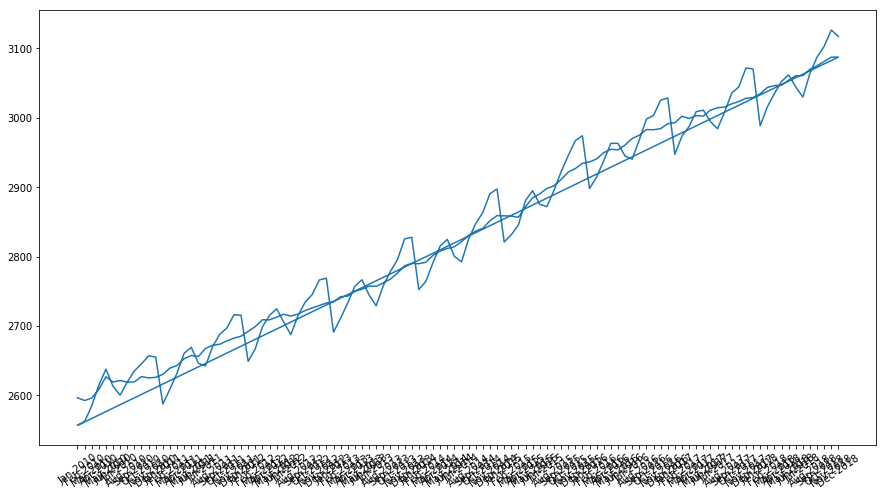

In [63]:
plt.figure(figsize = (15, 8))
plt.plot('month_year', 'job_count', data = tn_nonfarm)
plt.xticks(rotation = 35);

In [66]:
tn_nonfarm.head(20)

,seasonal,year,super,month,job_count,month_year
260,S,2010,Total Nonfarm,January,2596.7,Jan-2010
261,S,2010,Total Nonfarm,February,2592.7,Feb-2010
262,S,2010,Total Nonfarm,March,2596.2,Mar-2010
263,S,2010,Total Nonfarm,April,2608.7,Apr-2010
264,S,2010,Total Nonfarm,May,2626.9,May-2010
265,S,2010,Total Nonfarm,June,2619.4,Jun-2010
266,S,2010,Total Nonfarm,July,2621.5,Jul-2010
267,S,2010,Total Nonfarm,August,2619.1,Aug-2010
268,S,2010,Total Nonfarm,September,2619.6,Sep-2010
269,S,2010,Total Nonfarm,October,2627.2,Oct-2010
